In [4]:
import pandas as pd
import numpy as np
import random
from sklearn import preprocessing
import matplotlib.pyplot as plt
from datetime import date
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

In [142]:
df = pd.read_csv("data/data_pred.csv", usecols = ['PatientId', 'AppointmentID', 'Gender', 'Age', 'Neighbourhood', 'Scholarship',
       'Hipertension', 'Diabetes', 'Alcoholism', 'Handcap', 'SMS_received', 'NoShow', 'AwaitingTime', 'NbPrevious', 
        'NbPrevious_NoShow', 'ProportionNoShow', 'ScheduledHour', 'ScheduledDay', 'ScheduledMonth',
       'ScheduledYear', 'ScheduledWeekDay', 'AppointmentDay', 'AppointmentMonth', 'AppointmentYear',
       'AppointmentWeekDay'])
df_new_opti = pd.read_csv("data/opti_Maria.csv", usecols = ['PatientId', 'AppointmentID', 'Gender', 'Age', 'Neighbourhood', 'Scholarship',
       'Hipertension', 'Diabetes', 'Alcoholism', 'Handcap', 'SMS_received', 'NoShow', 'AwaitingTime', 'NbPrevious', 
        'NbPrevious_NoShow', 'ProportionNoShow', 'ScheduledHour', 'ScheduledDay', 'ScheduledMonth',
       'ScheduledYear', 'ScheduledWeekDay', 'AppointmentDay', 'AppointmentMonth', 'AppointmentYear',
       'AppointmentWeekDay'])
df_new_prev = pd.read_csv("data/pred_Maria.csv", usecols = ['PatientId', 'AppointmentID', 'Gender', 'Age', 'Neighbourhood', 'Scholarship',
       'Hipertension', 'Diabetes', 'Alcoholism', 'Handcap', 'SMS_received', 'NoShow', 'AwaitingTime', 'NbPrevious', 
        'NbPrevious_NoShow', 'ProportionNoShow', 'ScheduledHour', 'ScheduledDay', 'ScheduledMonth',
       'ScheduledYear', 'ScheduledWeekDay', 'AppointmentDay', 'AppointmentMonth', 'AppointmentYear',
       'AppointmentWeekDay'])

n1 = len(df)
n2 = len(df_new_prev)
n3 = len(df_new_opti)
df_c = pd.concat([df, df_new_prev, df_new_opti], axis = 0)
df_c.Gender = pd.get_dummies(df_c.Gender, columns = ['Gender'], drop_first = True)
df_c = pd.merge(df_c, pd.get_dummies(df.Neighbourhood, columns = ['Neighbourhood'], drop_first = True), left_index=True, right_index=True)
df_c = df_c.drop(columns=['Neighbourhood'])

In [143]:
df_new = df_c.iloc[n1:,:]
df = df_c.iloc[:n1,:]

In [144]:
X = df.loc[:, df.columns != 'NoShow']
y = df.NoShow

In [133]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0, stratify = df['NoShow'])

In [134]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
model = LogisticRegression()

# Fit the model to our data
model.fit(X, y)

LogisticRegression()

Train AUC: 0.644
Test AUC: 0.649


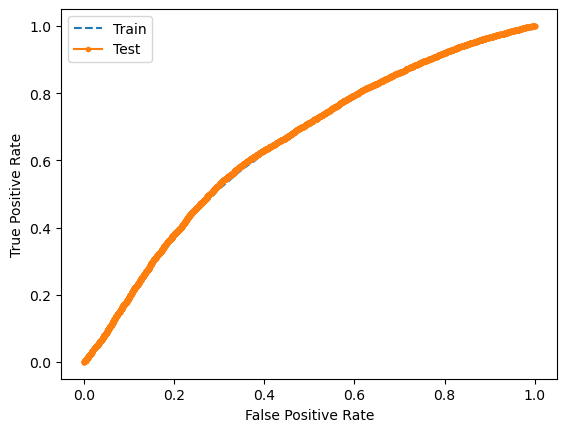

In [135]:
train_pred = model.predict_proba(X_train)[:,1]
test_pred = model.predict_proba(X_test)[:,1]

print("Train AUC: %.3f" % metrics.roc_auc_score(y_train, train_pred))
print("Test AUC: %.3f" % metrics.roc_auc_score(y_test, test_pred))

train_fpr, train_tpr, _ = metrics.roc_curve(y_train, train_pred)
test_fpr, test_tpr, _ = metrics.roc_curve(y_test, test_pred)

# plot the roc curve for the model
plt.plot(train_fpr, train_tpr, linestyle='--', label='Train')
plt.plot(test_fpr, test_tpr, marker='.', label='Test')
# axis labels
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
# show the legend
plt.legend()
# show the plot
plt.show()

In [146]:
X_new = df_new.loc[:, df_new.columns != 'NoShow']
new_pred = model.predict_proba(X_new)[:,1]

In [147]:
pd.DataFrame(new_pred).to_csv("data/pred_lr.csv", index = False)